# Shamp Week 2 HW Data 620

### Directions

1) Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

2) Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

3) Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

4) Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.


## Data

We will be using a data set from SNAP, listed above. It is the Reddit discussion, reply data set and we will subset it to a smaller size. The data is stored in a JSON file, so we will need to load that file and truncate it to the first 100 nodes

In [56]:
import networkx as net
import numpy as np
from networkx.readwrite import json_graph
import json
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
with open("reddit_edges.json", "r") as read_file:
    data = json.load(read_file)

We ran the first 10,000 nodes on this dataset looking for a single connected network that is subset; there were none. I guess we will move on to another data set. Don't try this at home. The code chunk below is flagged to not run so that due the time it takes to process. This is just an example of some of the work needed to find a subset of the network data. 

In [43]:
run_trial_nodes = False
if run_trial_nodes:
    for t in range(10000):
        trial_data = {f"{k}": data[f"{k}"] for k in range(t)}
        hw = net.Graph()
        hw.add_nodes_from(trial_data.keys())
        for k, v in trial_data.items():
            hw.add_edges_from([tuple(i) for i in v])
        try:
            dia = net.diameter(hw)
            print(dia, t)
        except:
            pass

## Graph Generator

After much searching, we landed on using a graph generator for this assignment. We will continue to search for, or create our own network for future use. However, for this homework example, a fully connected graph "out-of-the-box" will be helpful. NetworkX has many generators built-in, so we choose the Dorogovtsev-Mendes graph below.

In [72]:
H = net.generators.classic.dorogovtsev_goltsev_mendes_graph(5)

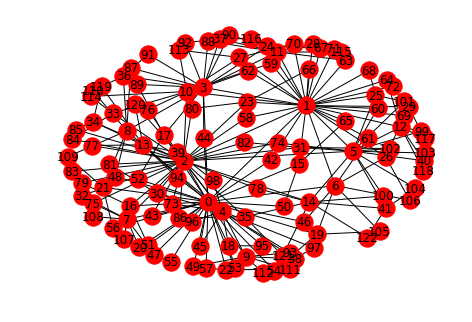

In [74]:
net.draw(H, with_labels=1)
plt.show()

The diamater of this graph is the value of N nodes that are input into the generator. In this case, the diameter is five. 

In [75]:
net.diameter(H)

5